# Netflix
## by Rwaa Alghamdi


![Alt text](netflixx.png "a title")

I love watching movies and tv shows on Netflix all the time. Thus, I was so excited to explore Its data. In this project I wanted to explore and analyze the Netflix dataset found on Kaggle: Netflix Movies and TV Shows (kaggle.com) using the CRISP-DM process of:

1.	Business Understanding

2.	Data Understanding

3.	Prepare Data

4.	Data Modeling

5.	Evaluate the Results

6.	Deploy

First, I opened the csv file and started looking at the raw data before downloading it on python. I actually found in the duration column some values were missing and right next to these values the rating column that were: “74 min”, “84 min”, “66 min” in the cells next to the missing cells in duration so figured its supposed to be the duration. So, I manually switched these few rows they were only 3 rows.



Then I started exploring by asking a few questions that I was hoping Netflix's data can answer like:
- What's the proportion of movies and tv shows?
- What's the distribution of movies and tv shows by their release year? and which year is the highest?
- What's the distribution of movies and tv shows by their added year? and which year is the highest?
- What's the period between when a movie gets released till it gets added to Netflix?
- Can I build a predictive model that predicts the number of years a movie takes to get added on Netflix since its release?


In [1]:
# First we will install all the libraries needed 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
%matplotlib inline


#then I'll read the netflix data
df = pd.read_csv(r"C:\Users\r.alghamdi\Downloads\project-data\netflix_titles.csv")


# To look at a sample of the data
df.head() 

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,25-Sep-21,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,24-Sep-21,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,24-Sep-21,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,24-Sep-21,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,24-Sep-21,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [2]:
# to see the number of rows and columns
print("We have ",df.shape[0]," rows and ",df.shape[1]," columns in the data") 
 

We have  8807  rows and  12  columns in the data


In [3]:
# here we put the columns and what they mean

In [4]:
df.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [5]:
sum(df.duplicated()) # we can see that we don't have duplicated vales in our data

0

In [6]:
# Here we will start prepparing the data
np.sum(df.isnull()) # the number of null values in each column
# We can see that we have a number of missing values in a few columns: director, cast, country, date_added, rating, duration

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [7]:
# We will handle the missing values for the director and cast with "NotAvailable" 
#And we will impute the country, date_added, and rating.

df['director'] = df['director'].fillna('NotAvailable')
df['cast'] = df['cast'].fillna('NotAvailable')

df['country'] = df['country'].fillna(df['country'].mode()[0])
df['date_added'] = df['date_added'].fillna(df['date_added'].mode()[0])
df['rating'] = df['rating'].fillna(df['rating'].mode()[0])

df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NotAvailable,United States,25-Sep-21,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NotAvailable,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,24-Sep-21,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,24-Sep-21,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NotAvailable,NotAvailable,United States,24-Sep-21,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NotAvailable,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,24-Sep-21,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


First question:
#### What's the proportion of movies and tv shows?

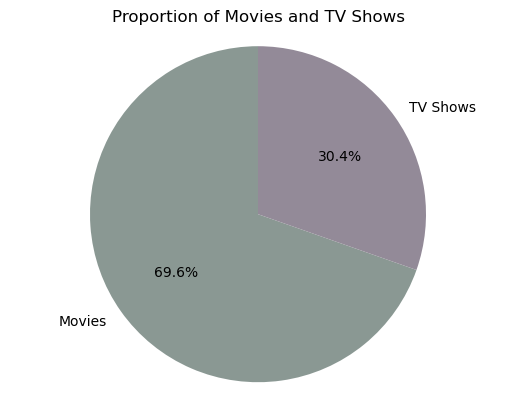

In [8]:
# Count movies and TV shows
total_movies = df[df['type'] == 'Movie'].shape[0]
total_tv_shows = df[df['type'] == 'TV Show'].shape[0]

# Plotting
labels=['Movies','TV Shows']
sizes = [total_movies, total_tv_shows]
colors = ['#8a9893', '#938a98']
plt.pie(sizes,labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.axis('equal') 
plt.title('Proportion of Movies and TV Shows')
plt.show()

Second question:
#### What's the distribution of movies and tv shows by their release year? and which year is the highest?

In [9]:

# Count all movies and tv shows by release_year
movies_by_release_year = df[df['type'] == 'Movie'].groupby('release_year').size()
tv_shows_by_release_year = df[df['type'] == 'TV Show'].groupby('release_year').size()


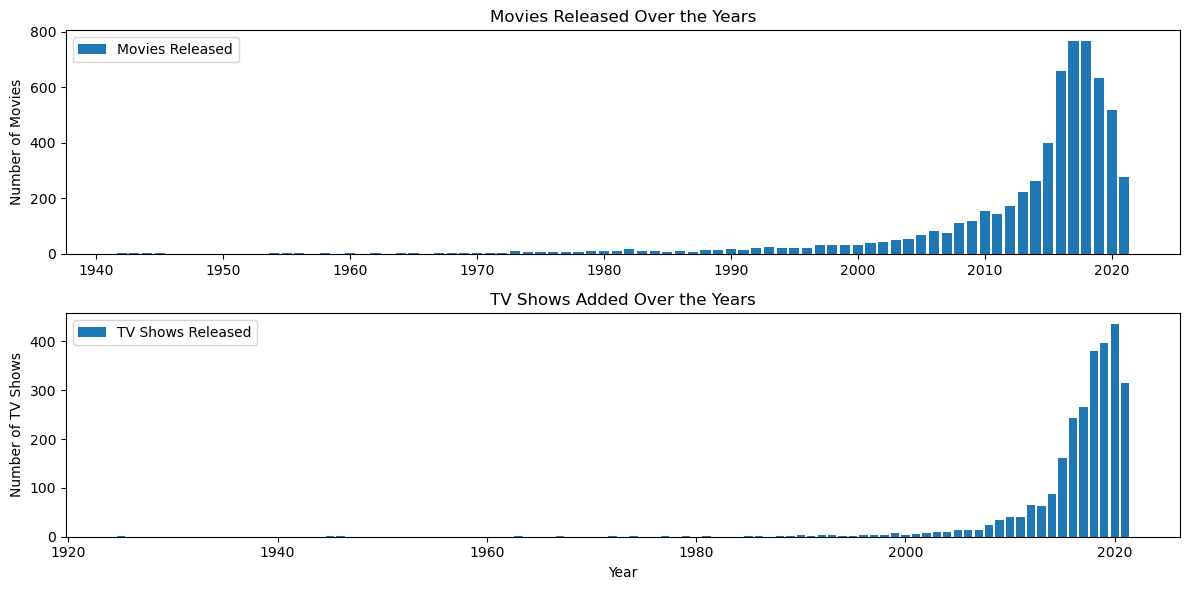

In [10]:

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12 ,6))

# Movies released over the years
ax1.bar(movies_by_release_year.index, movies_by_release_year, label='Movies Released')
ax1.set_ylabel('Number of Movies')
ax1.legend()
ax1.set_title('Movies Released Over the Years')

# TV Shows Released vs. Date Added
ax2.bar(tv_shows_by_release_year.index, tv_shows_by_release_year, label='TV Shows Released')
ax2.set_xlabel('Year')
ax2.set_ylabel('Number of TV Shows')
ax2.legend()
ax2.set_title('TV Shows Added Over the Years')

plt.tight_layout()
plt.show()

# We can see that the most movies that were released were in 2018 and 2017
# And the most tv shows that were released were in 2020

In [11]:
# to get the one year that has the most released movies I'll do the following:
# Filter type movies
movies= df[df['type'] == 'Movie']

# Find the year with the highest number of movies
year_with_most_movies = movies['release_year'].value_counts().idxmax()
year_with_most_movies 

2017

Third question:
#### What's the distribution of movies and tv shows by their added year? and which year is the highest?

In [12]:
# release year already is a year but date_added is a whole date so i'll convert it to a date then extract year from it.

df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

# Extract year from date_added

df['added_year'] = df['date_added'].dt.year


# Count movies and tV shows by added_year
movies_by_added_year = df[df['type'] == 'Movie'].groupby('added_year').size()
tv_shows_by_added_year = df[df['type'] == 'TV Show'].groupby('added_year').size()


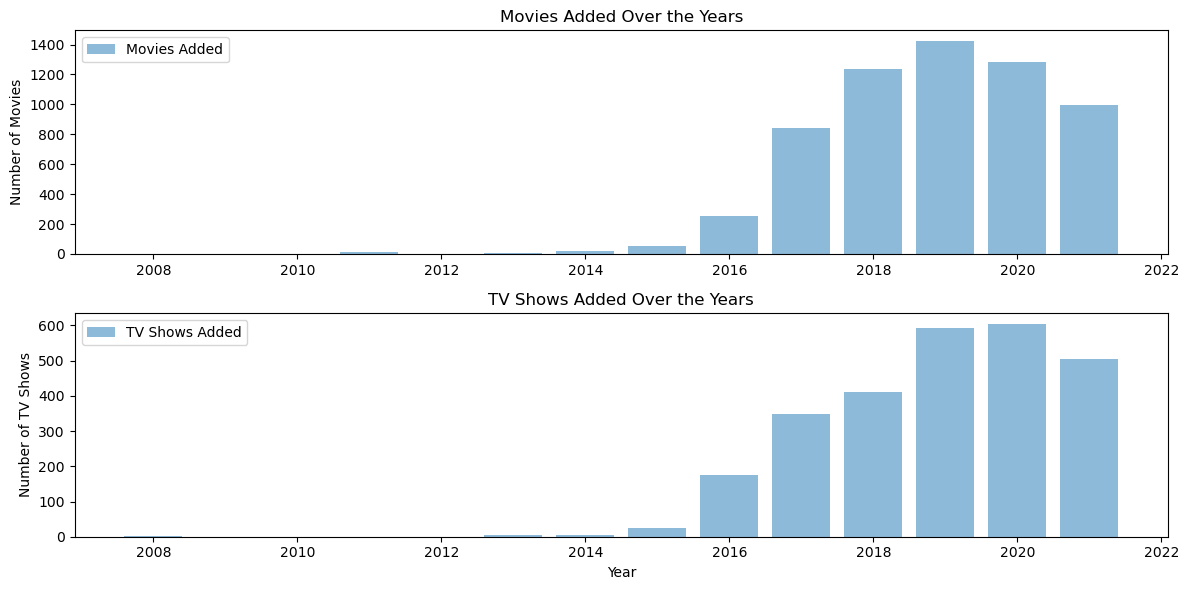

In [13]:

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12 ,6))

# Movies added over the years
ax1.bar(movies_by_added_year.index, movies_by_added_year, alpha=0.5, label='Movies Added')
ax1.set_ylabel('Number of Movies')
ax1.legend()
ax1.set_title('Movies Added Over the Years')

# TV shows added over the years
ax2.bar(tv_shows_by_added_year.index, tv_shows_by_added_year, alpha=0.5, label='TV Shows Added')
ax2.set_xlabel('Year')
ax2.set_ylabel('Number of TV Shows')
ax2.legend()
ax2.set_title('TV Shows Added Over the Years')

plt.tight_layout()
plt.show()

# We can see that movies the most movies that were added were in 2019
# and the most tv shows that were added were in 2020

In the first graph we can see that most movies were released in 2018 and 2017 and the number of movies are around 700
but in the graph below we see that in 2018 the number of movies added are around 1200 and in 2017 are around 800 
The cause would be because when movies are first released it premiers in cinemas first then gets added on streams like Netflix
But tv shows don't go to cinemas first that's why in the first graph we see that most tv shows were released in 2020 
And the in the second most tv shows were added in 2020 as well.


Third question:
#### What's the period between when a movie gets released till it gets added to Netflix?

In [14]:
movies= df[df['type'] == 'Movie'] # we will do this because the past movies df didn't have the added year
movies['period_until_added'] = (movies['added_year'] - movies['release_year'])
movies.head()

C:\Users\r.alghamdi\AppData\Local\Temp\ipykernel_10852\2317610617.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies['period_until_added'] = (movies['added_year'] - movies['release_year'])


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,added_year,period_until_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NotAvailable,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021,1
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",United States,2021-09-24,2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,2021,0
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",2021,28
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021-09-24,2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...,2021,0
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic",2021-09-23,2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...,2021,0


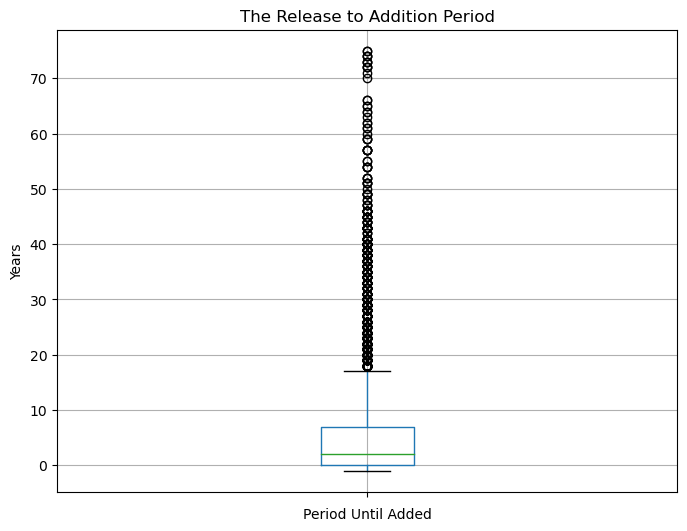

In [15]:
# Create a box plot with labels
fig, ax = plt.subplots(figsize=(8, 6))
boxplot = movies.boxplot(column=['period_until_added'], ax=ax)

# Add labels to the axes
ax.set_xlabel('Period Until Added')  
ax.set_ylabel('Years') 
ax.set_title('The Release to Addition Period')

# Remove the default column name shown under the graph
ax.set_xticklabels([])

plt.show()

In [16]:
movies['period_until_added'].mean()

5.727776871635949

In [17]:
q1 = movies['period_until_added'].quantile(0.25)
q3 = movies['period_until_added'].quantile(0.75)

In [18]:
q1

0.0

In [19]:
q3

7.0

Fourth question:
#### Can I build a predictive model that predicts the number of years a movie takes to get added on Netflix since its release?

In [20]:
# We will drop the date added because we don't need it
movies= movies.drop('date_added',axis=1)

In [21]:
# Create dummy variables for categorical columns
movies_with_dummies = pd.get_dummies(movies, columns=['type', 'country', 'rating'], drop_first=True)
movies_with_dummies.head()

,show_id,title,director,cast,release_year,duration,listed_in,description,added_year,period_until_added,...,rating_PG-13,rating_R,rating_TV-14,rating_TV-G,rating_TV-MA,rating_TV-PG,rating_TV-Y,rating_TV-Y7,rating_TV-Y7-FV,rating_UR
0,s1,Dick Johnson Is Dead,Kirsten Johnson,NotAvailable,2020,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021,1,...,1,0,0,0,0,0,0,0,0,0
6,s7,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",2021,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,2021,0,...,0,0,0,0,0,0,0,0,0,0
7,s8,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...",1993,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",2021,28,...,0,0,0,0,1,0,0,0,0,0
9,s10,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",2021,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...,2021,0,...,1,0,0,0,0,0,0,0,0,0
12,s13,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...",2021,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...,2021,0,...,0,0,0,0,1,0,0,0,0,0


In [22]:
list(movies_with_dummies.columns)

['show_id',
 'title',
 'director',
 'cast',
 'release_year',
 'duration',
 'listed_in',
 'description',
 'added_year',
 'period_until_added',
 'country_Argentina',
 'country_Argentina, Brazil, France, Poland, Germany, Denmark',
 'country_Argentina, Chile',
 'country_Argentina, Chile, Peru',
 'country_Argentina, France',
 'country_Argentina, France, United States, Germany, Qatar',
 'country_Argentina, Italy',
 'country_Argentina, Spain',
 'country_Argentina, United States',
 'country_Argentina, Uruguay, Serbia',
 'country_Argentina, Uruguay, Spain, France',
 'country_Argentina, Venezuela',
 'country_Australia',
 'country_Australia, Armenia, Japan, Jordan, Mexico, Mongolia, New Zealand, Philippines, South Africa, Sweden, United States, Uruguay',
 'country_Australia, Canada',
 'country_Australia, France',
 'country_Australia, France, Ireland',
 'country_Australia, India',
 'country_Australia, Iraq',
 'country_Australia, United Arab Emirates',
 'country_Australia, United Kingdom',
 'countr

In [23]:
X = movies[['release_year','rating','type','added_year']]
X = pd.get_dummies(X, columns=['type','rating'], drop_first=True).reset_index(drop=True)
X.head()


,release_year,added_year,rating_NC-17,rating_NR,rating_PG,rating_PG-13,rating_R,rating_TV-14,rating_TV-G,rating_TV-MA,rating_TV-PG,rating_TV-Y,rating_TV-Y7,rating_TV-Y7-FV,rating_UR
0,2020,2021,0,0,0,1,0,0,0,0,0,0,0,0,0
1,2021,2021,0,0,1,0,0,0,0,0,0,0,0,0,0
2,1993,2021,0,0,0,0,0,0,0,1,0,0,0,0,0
3,2021,2021,0,0,0,1,0,0,0,0,0,0,0,0,0
4,2021,2021,0,0,0,0,0,0,0,1,0,0,0,0,0


In [24]:
y = X['added_year']
y.head()

0    2021
1    2021
2    2021
3    2021
4    2021
Name: added_year, dtype: int64

In [25]:
X  = X.loc[:, X.columns != 'added_year']
X.head()

,release_year,rating_NC-17,rating_NR,rating_PG,rating_PG-13,rating_R,rating_TV-14,rating_TV-G,rating_TV-MA,rating_TV-PG,rating_TV-Y,rating_TV-Y7,rating_TV-Y7-FV,rating_UR
0,2020,0,0,0,1,0,0,0,0,0,0,0,0,0
1,2021,0,0,1,0,0,0,0,0,0,0,0,0,0
2,1993,0,0,0,0,0,0,0,1,0,0,0,0,0
3,2021,0,0,0,1,0,0,0,0,0,0,0,0,0
4,2021,0,0,0,0,0,0,0,1,0,0,0,0,0


In [29]:
def train_and_evaluate(X, y):
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    # Initialize and train the classifier
    clf = RandomForestClassifier(random_state=0)
    clf.fit(X_train, y_train)
    
    # Make predictions
    y_pred = clf.predict(X_test)
    
    # Print classification report
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
   
    # Calculate and print mean squared error
    mse = mean_squared_error(y_test, y_pred)
    print(f'Mean Squared Error: {mse}')

In [30]:
train_and_evaluate(X,y)

Classification Report:
              precision    recall  f1-score   support

        2008       0.00      0.00      0.00         1
        2010       0.00      0.00      0.00         1
        2011       0.00      0.00      0.00         2
        2013       0.00      0.00      0.00         2
        2014       0.00      0.00      0.00         7
        2015       0.00      0.00      0.00        18
        2016       0.44      0.05      0.09        79
        2017       0.33      0.58      0.42       233
        2018       0.38      0.46      0.41       354
        2019       0.42      0.49      0.45       429
        2020       0.52      0.40      0.45       402
        2021       0.64      0.40      0.50       312

    accuracy                           0.43      1840
   macro avg       0.23      0.20      0.19      1840
weighted avg       0.46      0.43      0.42      1840

Mean Squared Error: 1.9940217391304347


C:\Users\r.alghamdi\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\r.alghamdi\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\r.alghamdi\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

#### Summary:

The sheer amount of Netflix’s content is represented by movies (69.6%). In recent years the number of released movies and tv shows have increased dramatically which coincide with the same behavior in Netflix newly added media. Yet, the gap between the release and added year is not equally distributed between movies and tv shows which is accounted for the nature of their premiered lifecycle where movies tend to take longer before they get added to Netflix.

Wearing the hat of a Netflix faithful customer, knowing the exact year a newly released movie will be added to Netflix is an important information. Thus, I conducted a trial to predict this gap using the available data at hand. the preliminary results revealed an unfortunate news for the platform fans; the available data makes it hard to estimate the targeted gap with an average gap mistake of almost two years.